In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\נעמיה\fashion-mnist_train.csv')
data_test = pd.read_csv(r'C:\Users\נעמיה\fashion-mnist_test.csv')

In [3]:
dictionary = {
    0 :'T-shirt/top',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle boot'
}

# Getting the values from the dictionary
class_names = list(dictionary.values())

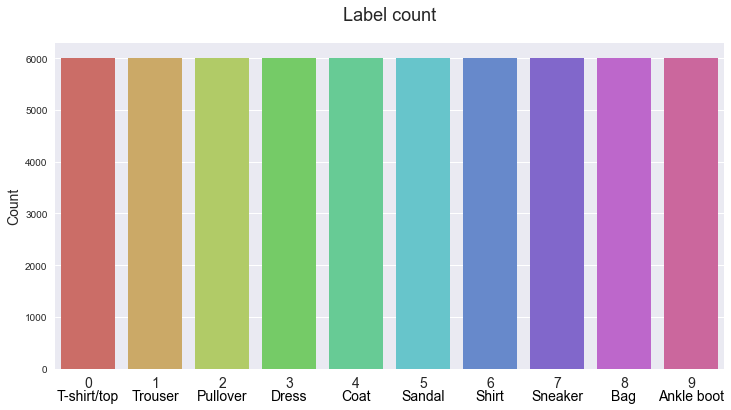

In [4]:
plt.style.use('seaborn')
fig, ax = plt.subplots(1,1, figsize = (12,6))
sns.countplot(x='label', data = df, ax = ax,palette="hls")

for i, counter in zip(ax.patches, range(0,10)):
        ax.text(x = i.get_x() + i.get_width()/2, y = -600,
                s = f"{class_names[counter]}",
                ha = 'center', size = 14, rotation = 0, color = 'black')

ax.set_title('Label count', fontsize = 18, y = 1.05)
ax.set_xticklabels(list(range(0,10)), fontsize = 14)
ax.set_xlabel(None)
ax.set_ylabel('Count', fontsize = 14);


Text(0.5, 1.05, 'First 30 images of Fashion MNIST')

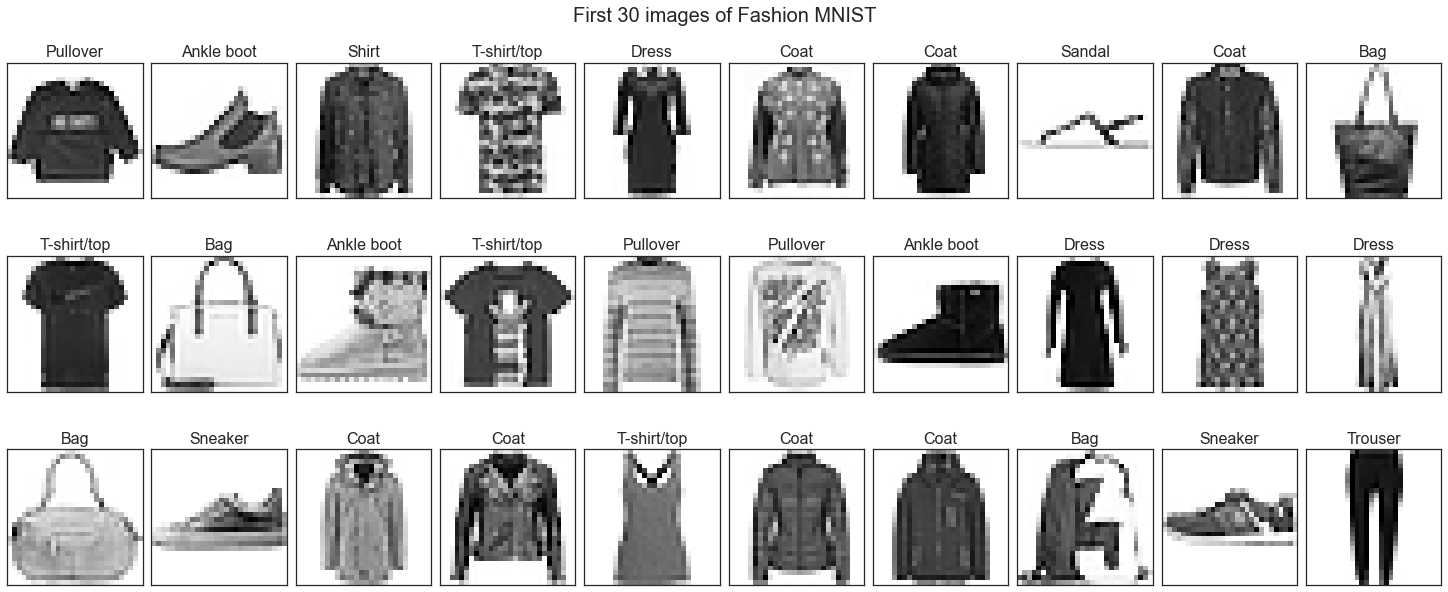

In [5]:
plt.style.use('seaborn-white')
fig, ax = plt.subplots(3,10, figsize = (20,8), constrained_layout = True)

for i, axis in zip(range(0,30), ax.ravel()):
    img = np.reshape(df.iloc[i, 1:].values, (28,28))
    axis.imshow(img)
    title = dictionary[df.iloc[i,0]]
    axis.set_title(title, fontsize = 16)
    axis.set_xticklabels("")
    axis.set_yticklabels("")
    
fig.suptitle('First 30 images of Fashion MNIST', size = 20, y=1.05)


In [6]:
from sklearn.model_selection import train_test_split

x = df.drop(['label'], axis = 1)
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [8]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [9]:
d

187

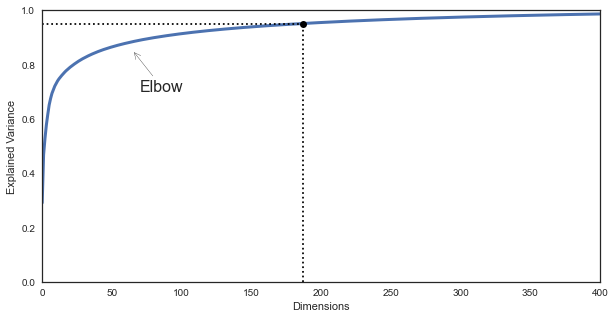

In [13]:
plt.figure(figsize=(10,5))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
#plt.grid(True)

plt.show()

In [17]:
pca = PCA(n_components=187)
x_train_red=pca.fit(x_train)
x_recovered = pca.inverse_transform(x_train_red)

TypeError: unsupported operand type(s) for *: 'PCA' and 'float'

In [16]:
x_train_red

PCA(n_components=187)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train_red, y_train)
knnpred = knn.predict(x_test)

ValueError: Expected 2D array, got scalar array instead:
array=PCA(n_components=187).
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
df_cm=confusion_matrix(y_test, rfpred,normalize='true')

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(df_cm*100, annot=True,xticklabels=class_names,yticklabels=class_names ,linewidths=.9,cmap="summer",
           cbar_kws={'format': '%.0f%%', 'ticks': [0, 25,50,75,100]},
            vmax=100,vmin=0)
sns.set(font_scale=1.2)
plt.title('Knn - Confusion matrix', fontsize = 18, y = 1.05)

In [184]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 25, max_depth = 12, random_state = 2)
rf.fit(x_train, y_train)
rfpred = rf.predict(x_test)

In [192]:

df_cm=confusion_matrix(y_test, rfpred,normalize='true')

Text(0.5, 1.05, 'Random forest - Confusion matrix')

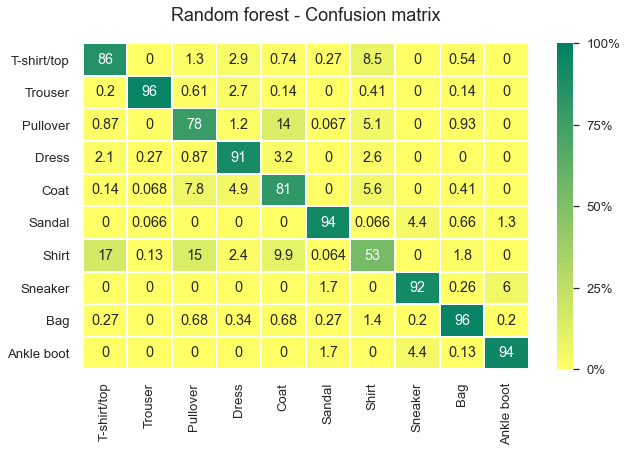

In [193]:
plt.figure(figsize = (10,6))
sns.heatmap(df_cm*100, annot=True,xticklabels=class_names,yticklabels=class_names ,linewidths=.9,cmap="summer_r",
           cbar_kws={'format': '%.0f%%', 'ticks': [0, 25,50,75,100]},
            vmax=100,vmin=0)
sns.set(font_scale=1.2)
plt.title('Random forest - Confusion matrix', fontsize = 18, y = 1.05)

In [105]:
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1488
           1       0.99      0.96      0.98      1467
           2       0.74      0.78      0.76      1500
           3       0.86      0.91      0.89      1491
           4       0.73      0.81      0.77      1478
           5       0.96      0.94      0.95      1526
           6       0.70      0.53      0.61      1552
           7       0.91      0.92      0.92      1534
           8       0.95      0.96      0.95      1477
           9       0.92      0.94      0.93      1487

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000

